In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

from lime import lime_image

from unboxer.class_heatmap import ClassHeatmap

Using TensorFlow backend.


In [2]:
cam = ClassHeatmap(model_architecture='vgg16',
                         img_shape=(224,224))

In [3]:
cam.model_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Working on filters: [145]
('guenon', 0.4549621)
('king_penguin', 0.12637396)
('colobus', 0.07697691)
('Appenzeller', 0.074598983)
('EntleBucher', 0.046342622)


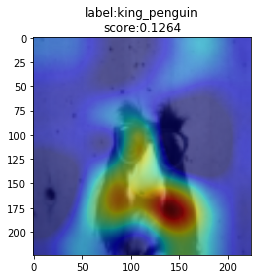

In [12]:
IMG_PATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/dogs/input/dog_glasses.png'
cam.plot_cam(img_path=IMG_PATH)

In [ ]:
cam.plot_saliency(img_path=IMG_PATH)